In [1]:
import sys
sys.path.append('/anaconda/lib/python2.7/site-packages')

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Imputer

In [4]:
train_data = pd.read_csv('Train_Imp.csv', index_col = 0)

In [5]:
train_data.head(5)

,id,1,2,3,4,5,6,7,8,9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,1,-0.389162,0.437228,0.403516,8,0.055564,75751,0.2254,11,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.96568,1564384.95710
1,2,1,-0.389162,0.437228,0.403516,3,0.388896,17369,0.0166,13,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.34906,2167437.93633
2,3,1,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1529197.38315,1911496.72894
3,4,1,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.42369,2139461.77962
4,5,6,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.26475,1584087.83094


Visualize the high frequency, 180min data (columne index 28 -- 207)

In [48]:
# Visualize the first 16 return curves
high_freq_df = train_data.ix[1:16, 28:207]
high_freq_df = high_freq_df.transpose()
high_freq_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Ret_2,-4.871459e-04,-0.000782,2.773425e-04,-1.232316e-03,-5.736361e-06,3.110509e-07,1.761826e-04,-3.981190e-04,-0.003707,-7.413615e-04,0.002022,-0.000464,2.967474e-04,-0.000683,0.001118,0.000003
Ret_3,4.745645e-04,-0.000402,-8.845993e-05,2.448918e-06,9.142691e-04,-2.666059e-05,5.580175e-04,-1.796765e-04,-0.000614,1.960092e-04,-0.001339,NaN,1.314516e-03,-0.000472,0.000480,NaN
Ret_4,1.737674e-06,0.000807,-1.989501e-04,-1.205046e-03,-2.472954e-04,-5.459490e-04,-6.963569e-06,-1.680062e-04,0.001855,3.797923e-04,0.001338,NaN,-1.522457e-04,-0.000208,0.000165,-0.000160
Ret_5,-1.825559e-06,0.000400,-3.012594e-04,-2.083995e-05,9.275496e-04,-9.559389e-05,4.701422e-06,-7.337452e-04,0.000004,-1.135425e-03,0.000011,0.000270,-5.955120e-04,-0.000771,-0.000276,0.000145
Ret_6,-5.234522e-04,0.000656,7.110048e-04,4.511930e-06,NaN,2.014750e-05,-1.551532e-05,1.779418e-04,-0.002486,-9.278750e-04,-0.001024,-0.000602,8.857884e-06,0.000002,-0.000214,-0.001190
Ret_7,-2.551758e-04,-0.001177,-4.311588e-04,6.233481e-04,-2.272352e-04,-2.733977e-04,-2.467405e-04,2.614606e-07,0.000622,1.836391e-04,0.001004,0.000161,2.955095e-04,0.000011,-0.000173,-0.000248
Ret_8,-8.018733e-06,0.001198,-1.436305e-04,-1.842938e-03,-1.563942e-06,2.452139e-04,7.100424e-05,2.039926e-04,-0.000003,1.828196e-04,-0.000679,0.000160,1.499181e-04,-0.000004,-0.000155,-0.000008
Ret_9,4.843796e-05,0.000610,3.404036e-04,4.518627e-06,-5.588487e-07,2.992528e-04,1.670708e-04,-9.284421e-04,0.000012,-4.902664e-06,0.000023,-0.000144,5.847688e-04,-0.000017,0.000833,-0.001068
Ret_10,-3.122019e-04,-0.001031,-6.393719e-04,1.226106e-03,2.316597e-04,-3.003194e-04,-7.287802e-04,NaN,-0.001229,7.435391e-04,0.000666,0.002227,-3.028971e-04,0.000187,-0.000013,NaN
Ret_11,-7.417844e-04,0.000647,4.197873e-04,1.213068e-03,-2.146772e-04,-9.924456e-05,2.569327e-04,NaN,-0.000625,1.310230e-03,0.000683,0.005612,-1.501115e-04,0.000187,-0.000159,-0.000260


There are also NaN in return data.  Right now we don't need to hurry to impute (we may not need to)

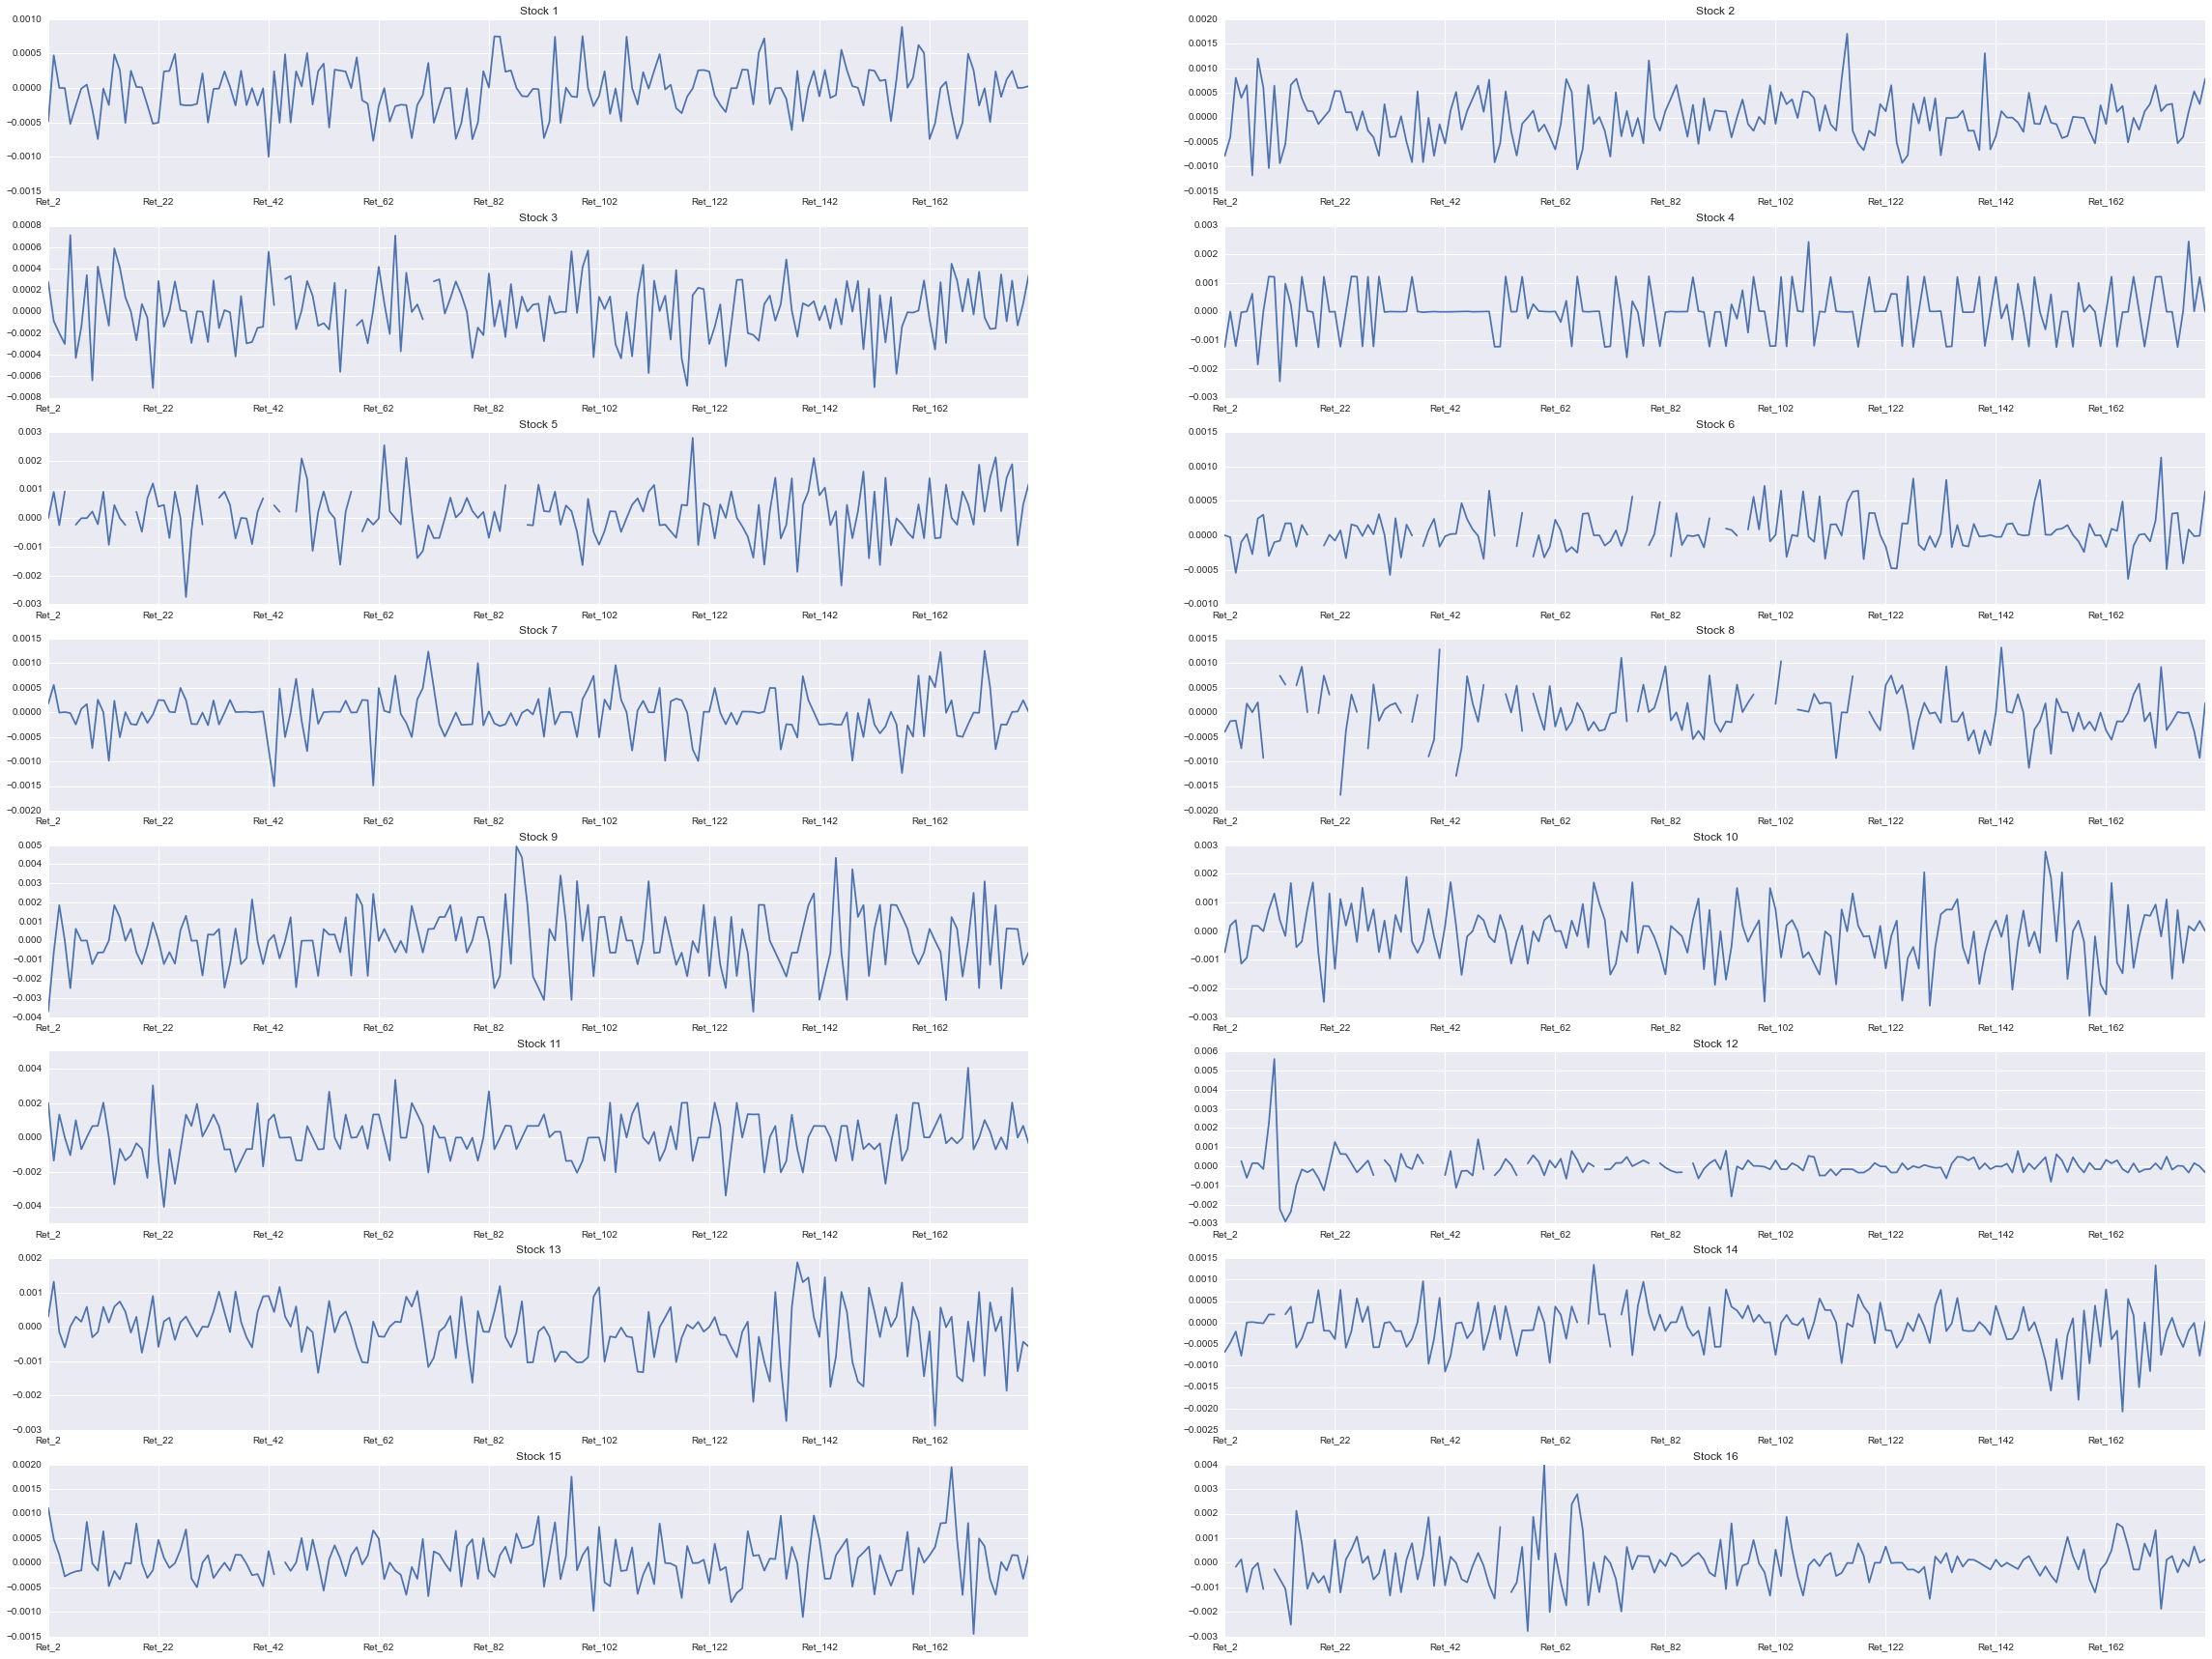

In [49]:
# Visualize the first 16 stocks

fig, axes = plt.subplots(nrows = 8, ncols = 2)

fig.set_size_inches(40, 30)

high_freq_df[1].plot(ax = axes[0,0]); axes[0,0].set_title('Stock 1')
high_freq_df[2].plot(ax = axes[0,1]); axes[0,1].set_title('Stock 2')
high_freq_df[3].plot(ax = axes[1,0]); axes[1,0].set_title('Stock 3')
high_freq_df[4].plot(ax = axes[1,1]); axes[1,1].set_title('Stock 4')
high_freq_df[5].plot(ax = axes[2,0]); axes[2,0].set_title('Stock 5')
high_freq_df[6].plot(ax = axes[2,1]); axes[2,1].set_title('Stock 6')
high_freq_df[7].plot(ax = axes[3,0]); axes[3,0].set_title('Stock 7')
high_freq_df[8].plot(ax = axes[3,1]); axes[3,1].set_title('Stock 8')
high_freq_df[9].plot(ax = axes[4,0]); axes[4,0].set_title('Stock 9')
high_freq_df[10].plot(ax = axes[4,1]); axes[4,1].set_title('Stock 10')
high_freq_df[11].plot(ax = axes[5,0]); axes[5,0].set_title('Stock 11')
high_freq_df[12].plot(ax = axes[5,1]); axes[5,1].set_title('Stock 12')
high_freq_df[13].plot(ax = axes[6,0]); axes[6,0].set_title('Stock 13')
high_freq_df[14].plot(ax = axes[6,1]); axes[6,1].set_title('Stock 14')
high_freq_df[15].plot(ax = axes[7,0]); axes[7,0].set_title('Stock 15')
high_freq_df[16].plot(ax = axes[7,1]); axes[7,1].set_title('Stock 16')

In [52]:
# Visualize the "-2, -1, +1, +2" Returns
low_freq_df = train_data.ix[1:16, [26, 27, 207, 208]]
low_freq_df = low_freq_df.transpose()
low_freq_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Ret_MinusTwo,0.009748,0.003077,0.000984,-0.018224,0.014473,-0.002893,0.004587,0.002507,0.045577,0.027998,0.004803,-0.010130,0.008704,-0.026065,0.019418,-0.011324
Ret_MinusOne,0.002987,0.006181,0.014106,0.011065,0.007139,0.006601,0.006156,-0.015937,0.043532,-0.002795,0.046535,-0.009580,-0.007754,0.016464,0.005882,0.028676
Ret_PlusOne,-0.002939,-0.024791,-0.005680,0.036104,0.031098,-0.011105,0.020268,-0.009348,0.022407,0.002055,0.097741,0.000599,-0.010936,0.001028,0.004728,0.009090
Ret_PlusTwo,-0.010253,0.015711,-0.002190,-0.026552,-0.006551,-0.030745,-0.059093,-0.024755,-0.010674,0.013504,0.035604,-0.027103,-0.019700,-0.001756,-0.016166,-0.003522


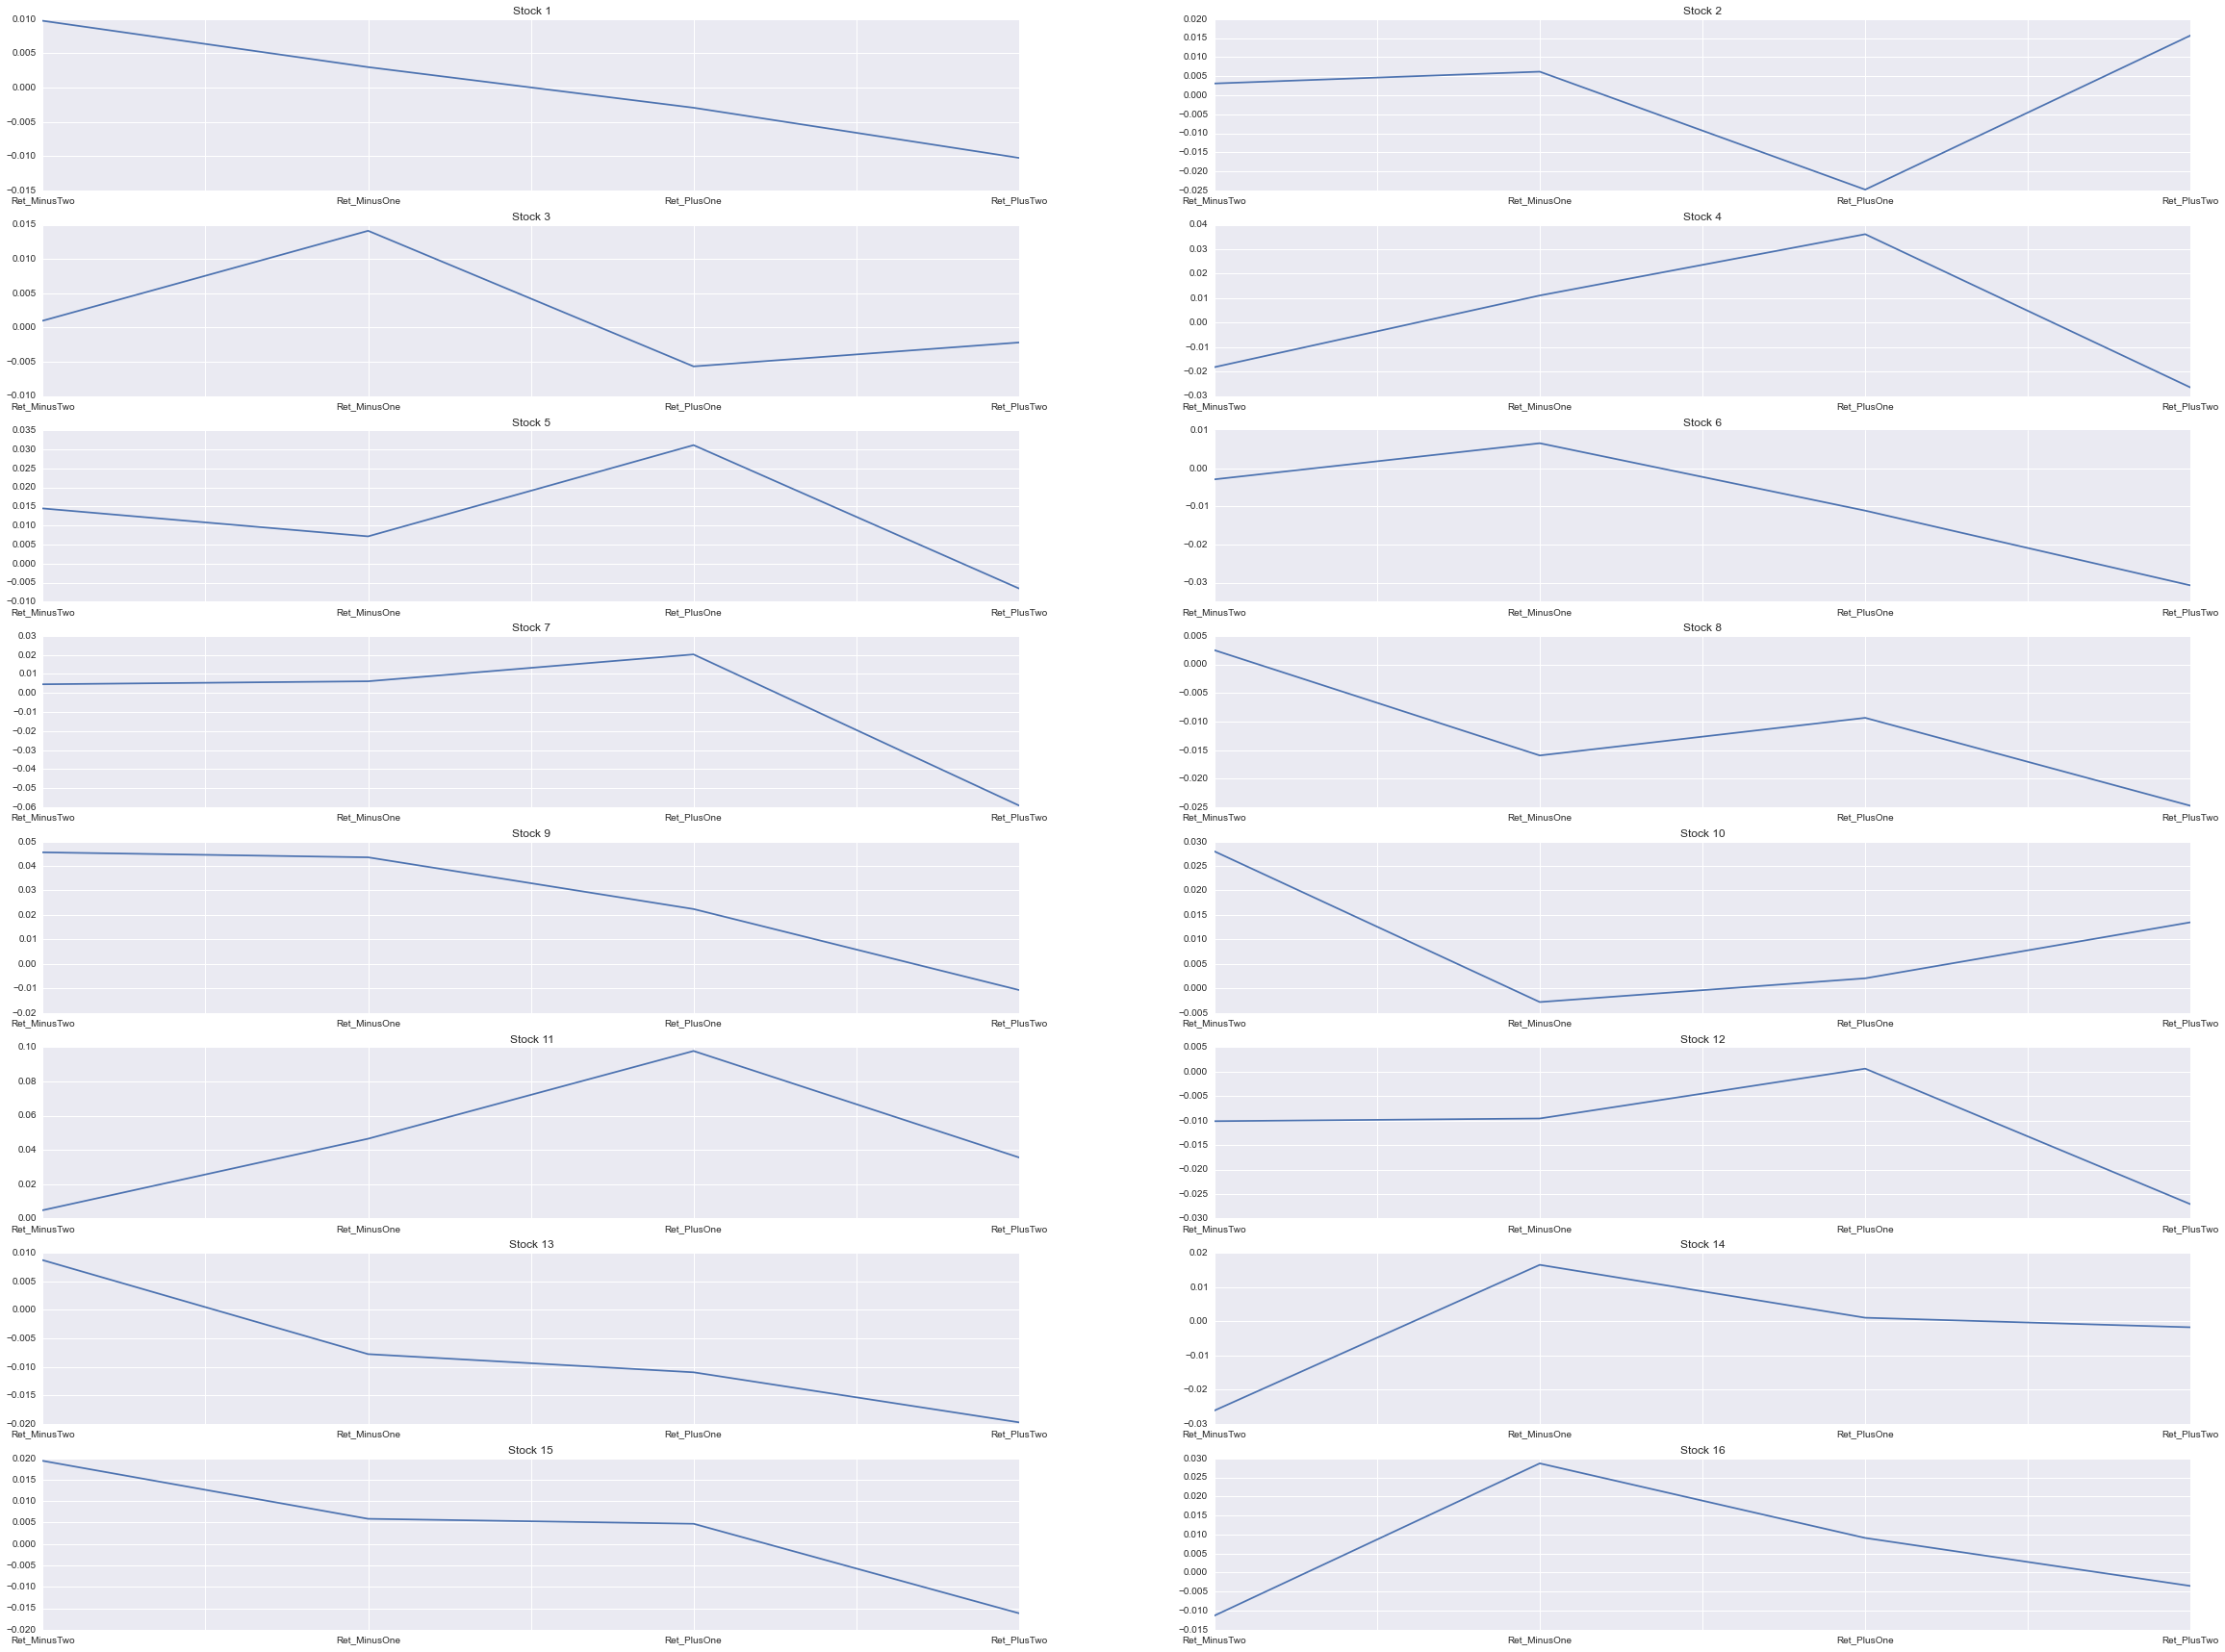

In [53]:
fig, axes = plt.subplots(nrows = 8, ncols = 2)

fig.set_size_inches(40, 30)

low_freq_df[1].plot(ax = axes[0,0]); axes[0,0].set_title('Stock 1')
low_freq_df[2].plot(ax = axes[0,1]); axes[0,1].set_title('Stock 2')
low_freq_df[3].plot(ax = axes[1,0]); axes[1,0].set_title('Stock 3')
low_freq_df[4].plot(ax = axes[1,1]); axes[1,1].set_title('Stock 4')
low_freq_df[5].plot(ax = axes[2,0]); axes[2,0].set_title('Stock 5')
low_freq_df[6].plot(ax = axes[2,1]); axes[2,1].set_title('Stock 6')
low_freq_df[7].plot(ax = axes[3,0]); axes[3,0].set_title('Stock 7')
low_freq_df[8].plot(ax = axes[3,1]); axes[3,1].set_title('Stock 8')
low_freq_df[9].plot(ax = axes[4,0]); axes[4,0].set_title('Stock 9')
low_freq_df[10].plot(ax = axes[4,1]); axes[4,1].set_title('Stock 10')
low_freq_df[11].plot(ax = axes[5,0]); axes[5,0].set_title('Stock 11')
low_freq_df[12].plot(ax = axes[5,1]); axes[5,1].set_title('Stock 12')
low_freq_df[13].plot(ax = axes[6,0]); axes[6,0].set_title('Stock 13')
low_freq_df[14].plot(ax = axes[6,1]); axes[6,1].set_title('Stock 14')
low_freq_df[15].plot(ax = axes[7,0]); axes[7,0].set_title('Stock 15')
low_freq_df[16].plot(ax = axes[7,1]); axes[7,1].set_title('Stock 16')

In [1]:
# See the feature distributions

